In [10]:
!pipenv install matplotlib
!pipenv install numpy
!pipenv install opencv-python==4.5.5.64  # downgraded due to a bug
!pipenv install opencv-python-headless==4.5.5.64  # downgraded due to a bug
!pipenv install pandas
!pipenv install Pillow
!pipenv install sklearn
!pipenv install tensorflow

Courtesy Notice: Pipenv found itself running within a virtual environment, so it will automatically use that environment, instead of creating its own for any project. You can set PIPENV_IGNORE_VIRTUALENVS=1 to force pipenv to ignore that environment and create its own instead. You can set PIPENV_VERBOSITY=-1 to suppress this warning.
Installing matplotlib...
Adding matplotlib to Pipfile's [packages]...
✔ Installation Succeeded 
Installing dependencies from Pipfile.lock (aab533)...
To activate this project's virtualenv, run pipenv shell.
Alternatively, run a command inside the virtualenv with pipenv run.
Courtesy Notice: Pipenv found itself running within a virtual environment, so it will automatically use that environment, instead of creating its own for any project. You can set PIPENV_IGNORE_VIRTUALENVS=1 to force pipenv to ignore that environment and create its own instead. You can set PIPENV_VERBOSITY=-1 to suppress this warning.
Installing numpy...
Adding numpy to Pipfile's [packag

In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

In [12]:
mobilenetv2 = tf.keras.applications.MobileNetV2()
model = mobilenetv2

2022-10-25 23:18:54.067618: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/jacob/.local/share/virtualenvs/excursion-tensorflow-AjiJEs0D/lib/python3.8/site-packages/cv2/../../lib64:
2022-10-25 23:18:54.068218: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-25 23:18:54.068504: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (JACOB-COMPUTER): /proc/driver/nvidia/version does not exist
2022-10-25 23:18:54.073905: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operati

(-0.5, 223.5, 223.5, -0.5)

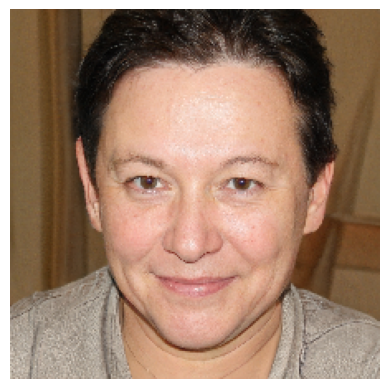

In [22]:
# img_path = tf.keras.utils.get_file(
#     "mountains.jpg",
#     "https://storage.googleapis.com/gcptutorials.com/examples/mountains.jpg"
# )
# img_path = tf.keras.utils.get_file(
#     "does-not-exist.jpg",
#     "https://thispersondoesnotexist.com/image"
# )

img_path = "/mnt/c/Users/jacob/Downloads/does-not-exist.jpg"

img = tf.keras.preprocessing.image.load_img(img_path, target_size=[224, 224])

plt.imshow(img)
plt.axis("off")

In [23]:
# TODO: what if I hadn't resized the image first?
array = tf.keras.preprocessing.image.img_to_array(img)
print(array.shape)

something = array[tf.newaxis, ...]
preprocessed_array = tf.keras.applications.mobilenet_v2.preprocess_input(something)
print(preprocessed_array.shape)

(224, 224, 3)
(1, 224, 224, 3)


In [24]:
predictions = model(preprocessed_array)
print(predictions)

tf.Tensor(
[[1.10749679e-03 4.94974025e-04 2.15697699e-04 1.47160608e-04
  8.18962799e-05 2.92593359e-05 8.65639158e-05 1.71555017e-04
  9.45308057e-05 1.05615152e-04 1.38639240e-04 1.30181506e-04
  6.79255536e-05 4.33635782e-04 6.13783835e-04 4.43311845e-04
  1.32662113e-04 1.02184153e-04 2.67732947e-04 2.93904159e-04
  1.53982270e-04 1.17753974e-04 1.55361369e-04 1.42961973e-04
  2.67717493e-04 8.64144167e-05 2.25454394e-04 4.26843064e-04
  6.81044476e-04 1.81655516e-04 2.60866567e-04 4.98246169e-04
  5.49326185e-04 2.47424032e-04 5.82266599e-04 2.88495474e-04
  2.51272460e-04 1.46100021e-04 2.62620772e-04 2.40173656e-04
  1.91360275e-04 1.33158785e-04 1.94247928e-04 1.78995149e-04
  1.42211895e-04 1.63537290e-04 4.64728189e-04 8.28441844e-05
  2.99268751e-04 1.21683326e-04 6.93882394e-05 1.33587615e-04
  7.35620270e-04 5.09723031e-04 1.15521572e-04 8.60575310e-05
  8.42435868e-04 1.85173965e-04 1.43989004e-04 4.41659766e-04
  2.97314691e-04 3.29715927e-04 4.14575625e-05 1.12880924e-

In [25]:
argsorted_predictions = np.argsort(predictions)
# top_5_classes_indices = argsorted_predictions[0,::-1][:5] + 1
top_5_classes_indices = argsorted_predictions[0,::-1][:5] + 1

print(top_5_classes_indices)

[420 839 835 904 773]


In [17]:
labels_path = tf.keras.utils.get_file(
    "imagenet-labels.txt",
    "https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt"
)

labels = np.array(open(labels_path).readlines())

In [26]:
top_5_classes = labels[top_5_classes_indices]
print(top_5_classes)

['Band Aid\n' 'sunscreen\n' 'suit\n' 'wig\n' 'safety pin\n']


In [8]:
# importing the python open cv library
import cv2

# intialize the webcam and pass a constant which is 0
cam = cv2.VideoCapture(-1)

# title of the app
# cv2.namedWindow('python webcam screenshot app')

# let's assume the number of images gotten is 0
img_counter = 0

# while loop
while True:
    # intializing the frame, ret
    ret, frame = cam.read()
    # if statement
    if not ret:
        print('failed to grab frame')
        break
    # the frame will show with the title of test
    # cv2.imshow('test', frame)
    plt.imshow(frame)
    #to get continuous live video feed from my laptops webcam
    k  = cv2.waitKey(1)
    # if the escape key is been pressed, the app will stop
    if k%256 == 27:
        print('escape hit, closing the app')
        break
    # if the spacebar key is been pressed
    # screenshots will be taken
    elif k%256  == 32:
        # the format for storing the images scrreenshotted
        img_name = f'opencv_frame_{img_counter}'
        # saves the image as a png file
        cv2.imwrite(img_name, frame)
        print('screenshot taken')
        # the number of images automaticallly increases by 1
        img_counter += 1

# release the camera
cam.release()

# stops the camera window
# cam.destoryAllWindows()


failed to grab frame


[ WARN:0@256.252] global /io/opencv/modules/videoio/src/cap_v4l.cpp (876) open VIDEOIO(V4L2): can't find camera device
